In [10]:
import pandas as pd

df = pd.read_csv('diabetes.csv') 
df.head()
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

df = pd.read_csv('diabetes.csv', header=None, names=column_names)
df.head()
import pandas as pd

df = pd.read_csv('diabetes.csv') 
df.head()
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

df = pd.read_csv('diabetes.csv', header=None, names=column_names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
import pandas as pd

column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]


df = pd.read_csv('diabetes.csv', header=None, names=column_names)


df.head()
import numpy as np


columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# replace zeros with NaN in specified columns
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)


df.isnull().sum()
df.dropna(inplace=True)

In [12]:
X = df.drop('Outcome', axis=1)  
y = df['Outcome']    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (313, 8)
Testing set size: (79, 8)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)                 
y_proba = model.predict_proba(X_test)[:, 1]

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[45  7]
 [11 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        52
           1       0.70      0.59      0.64        27

    accuracy                           0.77        79
   macro avg       0.75      0.73      0.74        79
weighted avg       0.77      0.77      0.77        79



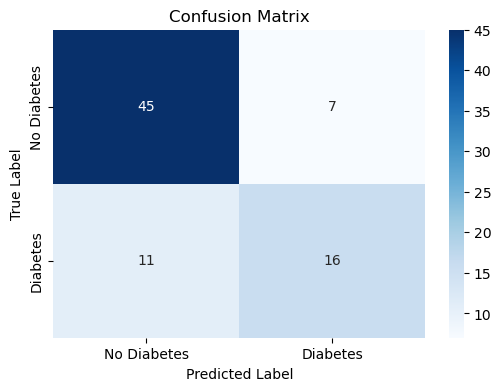

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()